# [Computational Social Science] 
## 3-1 Classification - Solutions

In this lab we will cover **Classification** methods. Some of this might look familiar from your previous statistics courses where you fit models on binary or categorical outcomes.

---

## Data

We're going to use our [Census Income dataset](https://archive.ics.uci.edu/ml/datasets/Census+Income) dataset again for this lab. Load the dataset in, and explore it.

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelBinarizer
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import make_classification
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot

%matplotlib inline
sns.set_style("darkgrid")

In [2]:
# Create a list of column names, found in "adult.names"
col_names = ['age', 'workclass', 'fnlwgt',
            'education', 'education-num',
            'marital-status', 'occupation', 
             'relationship', 'race', 
             'sex', 'capital-gain',
            'capital-loss', 'hours-per-week',
            'native-country', 'income-bracket']

# Read table from the data folder
census = pd.read_table("../../data/adult.data", sep = ',', names = col_names)

In [3]:
census.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income-bracket
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


Recall that before we try to train machine learning models on a dataset like this, we need to preprocess it. Preprocess the data to get it ready for training machine learning algorithms. Then, create a dataframe, **X**, that contains all of the features, and a series, **y**, that contains the target.

In [4]:
# Target
lb_style = LabelBinarizer()
y = census['income-bracket-binary'] = lb_style.fit_transform(census["income-bracket"])

# Features
X = census.drop(['income-bracket', 'income-bracket-binary'], axis = 1)
X = pd.get_dummies(X)
X.head()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,workclass_ ?,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Never-worked,...,native-country_ Portugal,native-country_ Puerto-Rico,native-country_ Scotland,native-country_ South,native-country_ Taiwan,native-country_ Thailand,native-country_ Trinadad&Tobago,native-country_ United-States,native-country_ Vietnam,native-country_ Yugoslavia
0,39,77516,13,2174,0,40,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,50,83311,13,0,0,13,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,38,215646,9,0,0,40,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,53,234721,7,0,0,40,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,28,338409,13,0,0,40,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Class Balance

Before we start modeling, let's look at the distribution of the target variable. Visualize the distribution of the target variable ("income-bracket"). What do you notice? What do you think this pattern suggests about how easy or difficult it would be for a machine learning model to make the correct classifications?

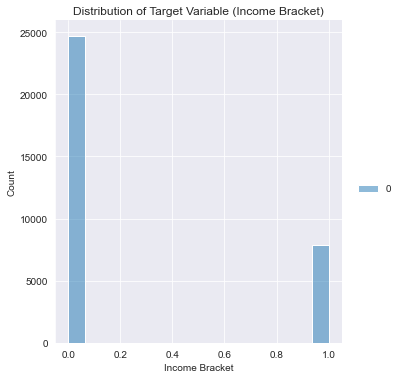

In [5]:
sns.displot(y)
plt.title("Distribution of Target Variable (Income Bracket)")
plt.xlabel('Income Bracket')
plt.ylabel('Count')
plt.show()

**Answer**: The target variable is slightly imbalanced. There are about 25,000 instances of the "<=50k" label, and around 7500 instance of the ">50k" label. This imbalance could be a problem because a machine learning model could optimize accuracy by guessing "0" ("<=50k") more often.

### Data Splitting

Split the data into train, validation, and test sets.

In [6]:
# Set seed
np.random.seed(10)

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = .80, test_size=0.20,
                                                   stratify=y)

X_train, X_validate, y_train, y_validate = train_test_split(X_train, y_train, train_size = .75, test_size = .25, 
                                                           stratify = y_train)

## Logistic Regression

Next, let's look at a [LogisticRegression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html). This example should look familiar from the Introduction to Machine Learning lab. Make a logistic regression model, fit it to the training data, and predict on the validation data.

In [7]:
# create a model
logit_reg = LogisticRegression()

# fit the model
logit_model = logit_reg.fit(X_train, y_train.ravel())

y_pred = logit_model.predict(X_validate)

Next, create a dataframe with the features and the logit coefficients (Note: For the logit coefficients you need to use np.transpose or extract the coefficients from the 1d array). Then plot the 10 coefficients with the largest absolute value. Hint: Consider creating a new column with the absolute values for the coefficients, and then using the nlargest before plotting.

In [8]:
logit_data = pd.concat([pd.DataFrame(X.columns),pd.DataFrame(np.transpose(logit_model.coef_))], axis = 1)
logit_data.columns = ['Feature', 'Coefficient']
logit_data['abs_coef'] = abs(logit_data['Coefficient'])

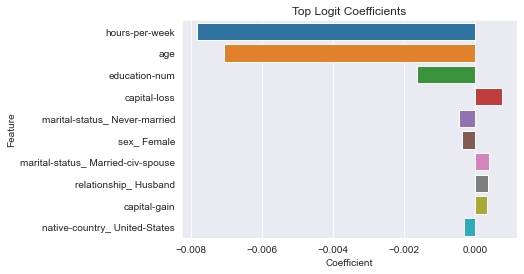

In [9]:
sns.barplot(x="Coefficient", y="Feature", data=logit_data.nlargest(10, 'abs_coef')).set_title("Top Logit Coefficients")
plt.show()

Create a confusion matrix to visualize how well you did with your predictions. What do you notice? 

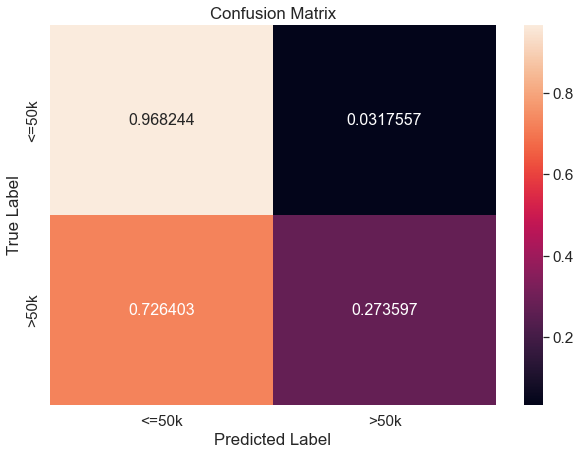

In [10]:
cf_matrix = confusion_matrix(y_validate, y_pred, normalize = "true")

df_cm = pd.DataFrame(cf_matrix, range(2),
                  range(2))

df_cm = df_cm.rename(index=str, columns={0: "<=50k", 1: ">50k"})
df_cm.index = ["<=50k", ">50k"]
plt.figure(figsize = (10,7))
sns.set(font_scale=1.4)#for label size
sns.heatmap(df_cm, 
           annot=True,
           annot_kws={"size": 16},
           fmt='g')

plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

## Support Vector Machine

The next model we will look at is a [Support Vector Machine](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html). SVM is a non-parametric method that looks for the "best separating hyperplane" between two classes.

<img src="https://github.com/dlab-berkeley/Computational-Social-Science-Training-Program/blob/master/images/svm_kernel_machine.png?raw=true" style="width: 500px; height: 275px;" />

Initialize a Support Vector Machine model, fit it on the training data, and predict on the validation data. Visualize the confusion matrix. How does it compare to the other models?

In [11]:
# create a model
svm = SVC()

# fit the model
svm_model = svm.fit(X_train, y_train.ravel())

y_pred = svm_model.predict(X_validate)

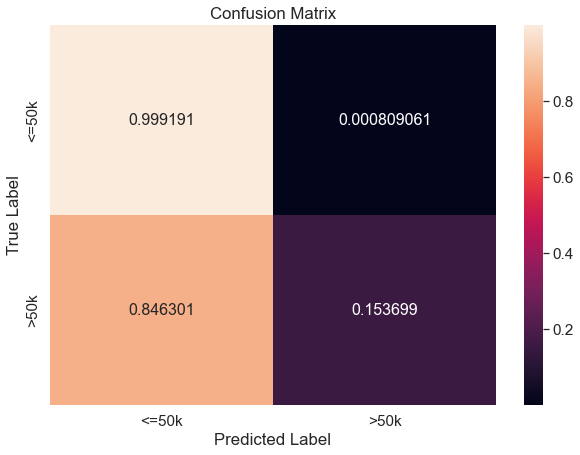

In [12]:
cf_matrix = confusion_matrix(y_validate, y_pred, normalize = "true")

df_cm = pd.DataFrame(cf_matrix, range(2),
                  range(2))

df_cm = df_cm.rename(index=str, columns={0: "<=50k", 1: ">50k"})
df_cm.index = ["<=50k", ">50k"]
plt.figure(figsize = (10,7))
sns.set(font_scale=1.4)#for label size
sns.heatmap(df_cm, 
           annot=True,
           annot_kws={"size": 16},
           fmt='g')

plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

## Hyperparameter Tuning

As with sklearn's regression methods, we can also use [GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html) to search for optimal hyperparameters. Choose one of the classification methods we have used so far and do a grid search to find the best hyperparameter values. **Note**: You might notice that the grid search takes a **very** long time to complete depending on the model and hyperparameters chosen.

In [13]:
import warnings
from sklearn.exceptions import DataConversionWarning
warnings.filterwarnings(action='ignore')
from sklearn.metrics import accuracy_score

param_grid = {'penalty': ['l1', 'l2', 'elasticnet'],
             'C': np.arange(.1, 1, .1),
               'fit_intercept': ['True', 'False'],
             'solver': ['liblinear', 'saga']}

logit_grid = GridSearchCV(logit_model, param_grid, cv=3)
logit_grid.fit(X_train, y_train)

best_index = np.argmax(logit_grid.cv_results_["mean_test_score"])
best_logit_pred = logit_grid.best_estimator_.predict(X_validate)

print(logit_grid.cv_results_["params"][best_index])
print('Validation Accuracy', accuracy_score(best_logit_pred, y_validate))

{'C': 0.1, 'fit_intercept': 'True', 'penalty': 'l1', 'solver': 'saga'}
Validation Accuracy 0.851504914004914


## Metrics

In machine learning, accuracy isn't the only metric that we might care about. Accuracy is an expression of ratio of correct observations relative to incorrect observations. This calculation alone does not tell us much about whether we did a good job predicting all of the various categories that we might be concerned about. Consider our census dataset. We saw earlier that the target data is not equally distributed - there were far more people with "<=50k" income. As we saw in our confusion matrices, our algorithms tended to predict observations belonging to the "<=50k" category remarkably well, but tended to do much worse with the ">50k" category. Why do you think this might be the case?

**Answer**: The class imbalance means that an algorithm can tend to do better just by picking the majority class. Accuracy might look good this way, but with a severe enough class imbalance, this score could be misleading.

Let's define a few metrics that will help us move beyond accuracy as our only measure:

$$
True \space Positives = \sum({Predicted \space Positives = Observed \space Positives})
$$

$$
False \space Positives = \sum({Predicted \space Positives \space != Observed \space Positives})
$$

$$
True \space Negatives = \sum({Predicted \space Negatives = Observed \space Negatives})
$$

$$
False \space Negatives = \sum({Predicted \space Negatives \space != Observed \space Negatives})
$$

Imagine we were primarily interested in detecting whether someone is ">50k". We'll call this the "positive" class. A "predicted" observation is the value the model predicted, while the "observed" observation is the value in the ground-truth labels. So a "true positive" in this case would be instances when the model predicted someone to be in the ">50k" category AND they were in the ">50k" category in reality. Similarly, a false positive would be instances where the model predicted someone was in the ">50k" category when they were actually in the "<=50k" category in reality. Use your best model from hyperparameter to predict on the validation set and see how you did on each of these metrics. **Hint**: The confusion matrix is actually a great way to visualize all of these. What does each quadrant of the matrix correspond to in terms of these metrics?

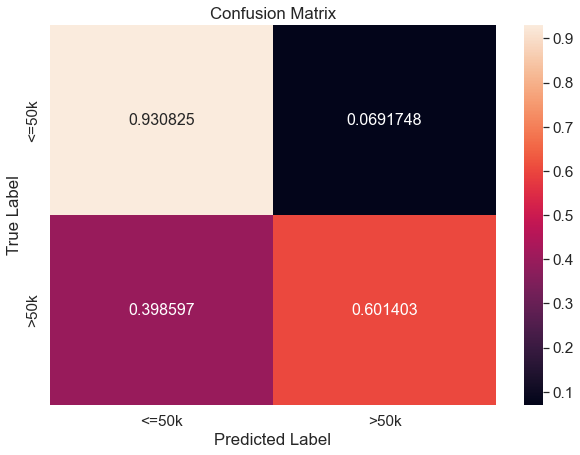

In [14]:
cf_matrix = confusion_matrix(y_validate, best_logit_pred, normalize = "true")

df_cm = pd.DataFrame(cf_matrix, range(2),
                  range(2))

df_cm = df_cm.rename(index=str, columns={0: "<=50k", 1: ">50k"})
df_cm.index = ["<=50k", ">50k"]
plt.figure(figsize = (10,7))
sns.set(font_scale=1.4)#for label size
sns.heatmap(df_cm, 
           annot=True,
           annot_kws={"size": 16},
           fmt='g')

plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

**Answer**: The top left quadrant in this case would be true negatives, top right false positives, bottom left false negatives, bottom right true positives. In this case, we do a really good job with true negatives (.93), but not as well with true positives (.60). Because of the class imbalance there are still a large number of false negatives.

These metrics matter in the social sciences because we usually are not given balanced datasets, and we are oftentimes concerned with predicting rare events. Predicting rare events like fraud, credit defaults, and mortality is difficult. Optimizing on accuracy alone can be misleading if the algorithm just guesses the majority class every time without ever predicting the outcome of interest. 

## Accuracy

Recall the metrics we defined last week: **True Positives (TP)**, **False Positives (FP)**, **True Negatives (TN)**, and **False Negatives (FN)**. Accuracy can be expressed as:

$$
Accuracy = \frac{TP + TN}{TP + TN + FP + FN}
$$

In plain language, what does this formula represent?

**Answer**: The numerator is the number of correction predictions regardless of direction, divided by the total number observations (correct predictions + incorrect predictions).

Write code to calculate the accuracy of your logistic regression. Calculate the number of true positives, false positives, true negatives, and false negatives and then calculate and print the accuracy.

In [15]:
range(len(y_pred))

range(0, 6512)

In [16]:
TP = 0
FP = 0
TN = 0
FN = 0

for i in range(len(y_pred)): 
    if y_validate[i]==y_pred[i]==1:
       TP += 1
    if y_pred[i]==1 and y_validate[i]!=y_pred[i]:
       FP += 1
    if y_validate[i]==y_pred[i]==0:
       TN += 1
    if y_pred[i]==0 and y_pred[i]!=y_validate[i]:
       FN += 1

In [17]:
accuracy = (TP + TN)/(TP + TN + FP + FN)
print("Accuracy is", accuracy)

Accuracy is 0.7956081081081081


## Precision

Precision is a measure of how well calibrated predictions are. The formula for precision is:

$$
Precision = \frac{TP}{TP + FP}
$$

**Question**: In plain language, what does this formula tell us?

**Answer**: This formula tell us of the predictions in the positive class (">50k" in this case) we made, how many were correct.

Calculate and print the precision for the logistic regression.

In [18]:
precision = TP/(TP + FP)
print("Precision is", precision)

Precision is 0.9836734693877551


## Recall

Recall is defined as:

$$
Recall = \frac{TP}{TP + FN}
$$

**Question**: In plain language, what does the formula tell us?

**Answer**: Of all of the positive class members in the ground truth labels, how many did we successfully predict as positive?

Calculate the recall for our logistic regression model. 

In [19]:
recall = TP/(TP + FN)
print("Recall is", recall)

Recall is 0.15369897959183673


**Question**: How did we do on precision and recall? Could you optimize for one or the other?

**Answer**: We did pretty good on precision, but not great on recall. We could try to improve recall by guessing more in the positive class, but this would reduce precision if we made lots of incorrect predictions. At the extremes, we could get to a recall of 1 by guessing "1" for each prediction, or a precision of 1 by making exactly one correct true positive prediction and stopping. However, these extremes are unlikely to be helpful in an applied social science context.

## F1 Score

The precision-recall tradeoff can be managed in a few different ways. One popular metric is the F1 score. It is defined as:

$$
F1 = 2 * \frac{precision * recall}{precision + recall}
$$

Calculate and print the f1 score.

In [20]:
f1 = 2 * (precision * recall)/(precision + recall)
print("F1 Score is", f1)

F1 Score is 0.26585769442912305


**Question**: How does F1 trade off between precision and recall? What are the advantages and disadvantages?

**Answer**: F1 is advantageous because the numerator can be penalized by either low precision OR recall. The disadvantage of this approach is that without adjustments, the F1 score prioritizes precision and recall equally. Depending on the application, we might care about one more than the other.

## AUC-ROC

[Area Under the Curve - Receiver Operating Characteristic (AUC-ROC)](https://en.wikipedia.org/wiki/Receiver_operating_characteristic) is a popular method for seeing how well an algorithm does at separating between two classes. It is calculated by plotting the True Positive Rate against the False Positive Rate. Let's define these quantities:

$$
True \space Positive \space Rate(TPR) = Sensitivity = \frac{TP}{TP + FN}
$$

Hm, this formula looks familiar. In fact, it is exactly the same as Recall! Meanwhile, the False Positive Rate is:

$$
False \space Positive \space Rate (FPR) = 1 - Specificity = \frac{FP}{TN + FP}
$$

**Question**: Why does plotting TPR against FPR express separability between class labels?

**Answer**: By comparing TPR to FPR, we can see how well a model does at detecting the positive class. A TPR of 1 and a FPR of 0 would imply that the model does a perfect job at classifying positives as positives and negatives as negatives. It basically contextualizes Recall.

Fill in the following code to plot the AUC-ROC for the logistic regression and a "no skill" model. Make sure to look up documentation as necessary.

No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.592


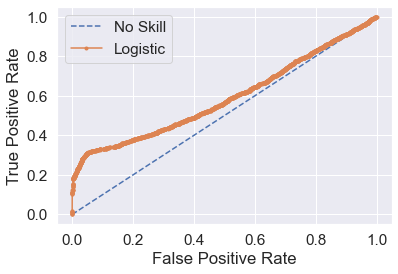

In [21]:
# roc curve and auc

# split into train/test sets
# generate a no skill prediction (majority class)
ns_probs = [0 for _ in range(len(y_validate))]


# predict probabilities for logistic regression
lr_probs = logit_model.predict_proba(X_validate)

# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]

# calculate scores
ns_auc = roc_auc_score(y_validate, ns_probs)
lr_auc = roc_auc_score(y_validate, lr_probs)

# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Logistic: ROC AUC=%.3f' % (lr_auc))

# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_validate, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_validate, lr_probs)

# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

**Question**: How did the logistic regression do on the AUC-ROC metric? Compared to the "no skill" decision rule, was it a meaningful improvement?

**Answer**: The logit regression does slightly better than the "no skill" method, but not by much.

## Over and Under Sampling

We have seen that imbalanced data can cause all sorts of problems and give us misleading results, especially if we only focus on accuracy. How can we correct for these problems? One simple method is to **resample** the data. For example, you might **oversample** the minority class or **undersample** the majority class. Let's use the [**imblearn**](https://imbalanced-learn.readthedocs.io/en/stable/api.html) to try this out. First, you might need to run the cell below to install the library. Anytime you use "!" in a Jupyter notebook, this will actually run a bash command.

In [22]:
!pip install imblearn

  Using cached imblearn-0.0-py2.py3-none-any.whl (1.9 kB)
     |████████████████████████████████| 189 kB 3.4 MB/s eta 0:00:01


Now let's import the RandomOverSampler and RandomUnderSampler methods. Then take a look at the first 15 values in y_train before we resample.

**Question**: Why would we resample the training set, instead of the dataset or the validation/test sets?

**Answer**: We want our evaluations to be as close to reality as possible. If the actual social science or policy problem has imbalanced class labels, we don't want to make an algorithm look artificially good by validating and testing in a resampled dataset that does not resemble the ground truth.

In [23]:
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

In [24]:
y_train[0:30]

array([[0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0]])

Next use either the RandomOverSampler or RandomUnderSampler to resample the training set.

In [25]:
random_over_sampler = RandomOverSampler(sampling_strategy=0.5)
random_under_sampler = RandomUnderSampler(sampling_strategy=0.5)

X_train_new, y_train_new = random_under_sampler.fit_resample(X_train, y_train)

Check the training labels again. Did anything change?

In [26]:
y_train_new[0:30]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0])

**Question**: What do you notice about the resampled training targets? What might be some issues with over and undersampling?

**Answer**: The new targets have more instances of the positive class. Random over and undersampling could be a problem because it could force a model to overtrain on idiosyncrasies in the training data in the case of oversampling, or throw away useful information in the case of undersampling.

Retrain the logistic regression model on the newly resampled data. How does AUC-ROC change?

No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.622


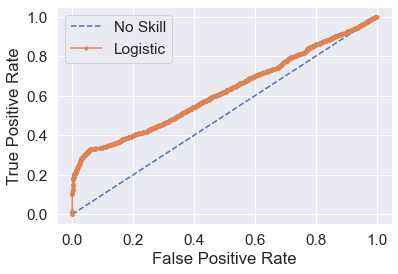

In [27]:
# fit the model
logit_model = logit_reg.fit(X_train_new, y_train_new)

y_pred = logit_model.predict(X_validate)

# roc curve and auc

# split into train/test sets
# generate a no skill prediction (majority class)
ns_probs = [0 for _ in range(len(y_validate))]


# predict probabilities for logistic regression
lr_probs = logit_model.predict_proba(X_validate)

# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]

# calculate scores
ns_auc = roc_auc_score(y_validate, ns_probs)
lr_auc = roc_auc_score(y_validate, lr_probs)

# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Logistic: ROC AUC=%.3f' % (lr_auc))

# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_validate, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_validate, lr_probs)

# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

**Answer**: Looks like we did a little bit better!

Overall, while sklearn puts together many of the methods we need to train, predict, and visualize the results of our machine learning, there are a lot of substantive choices involved. As you can see, even a slightly imbalanced dataset can cause problems. If you optimize only on accuracy, you might miss relevant aspects of the problem. Be mindful of the various metrics available, and decide which ones best answer the scientific question you have in mind.

---
Authored by Aniket Kesari. Updated by K. Quinn Fall 2021. 